In [114]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.metrics import classification_report

### Overfitting

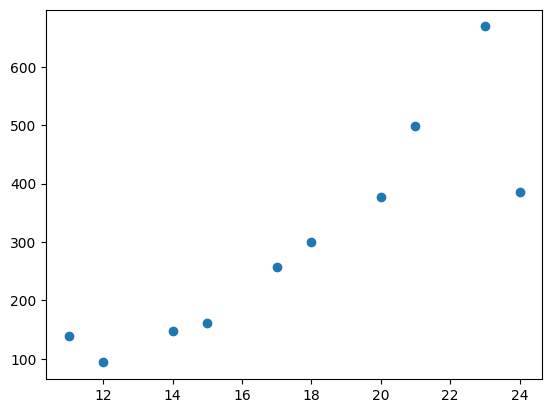

In [115]:
with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

fig, ax = plt.subplots()
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]
ax.scatter(x, y)

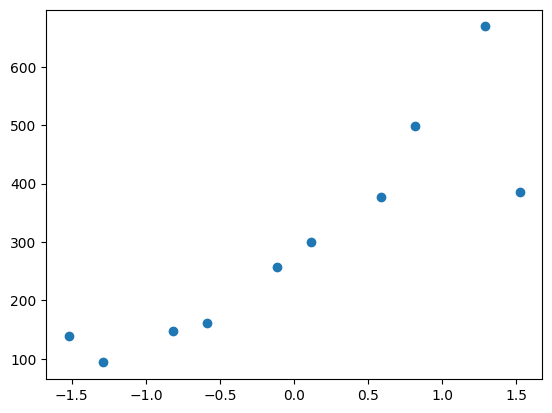

In [116]:
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)

fig, ax = plt.subplots()
ax.scatter(x, y)

In [117]:
def h_fun(X, theta):
    return np.dot(X, theta)

def calculate_cost(X, Y, theta):
    f = h_fun(X, theta)
    return np.mean((f - Y)**2)

Koszt =  185.65425474416014


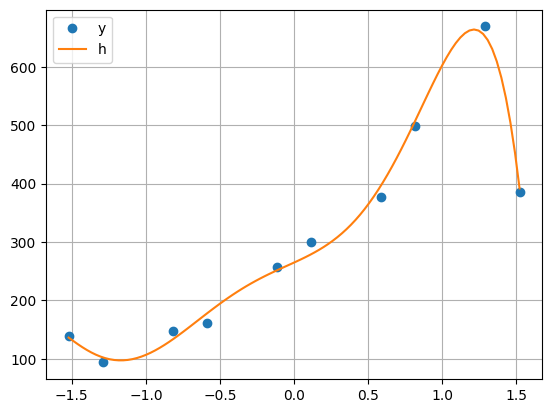

In [118]:
poly_features = PolynomialFeatures(degree=6)
fitter_scaler = poly_features.fit_transform(x)

eps = 1e-3
alpha = 1e-3
theta = np.zeros(fitter_scaler.shape[1])
f = h_fun(fitter_scaler, theta)


J = calculate_cost(fitter_scaler, y, theta)
J2 = J + 10
m = len(data[:, 0])
while np.abs(J - J2) > eps:
    J = J2
    h_y_diff = (h_fun(fitter_scaler, theta) - y)
    gradient = np.dot(fitter_scaler.T, h_y_diff)
    theta = theta - alpha * gradient / m
    J2 = calculate_cost(fitter_scaler, data[:, 1], theta)

print("Koszt = ", J)

# Plotowanie
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)
y_values = h_fun(x_values_poly, theta)

plt.figure()
plt.plot(x, y, "o")
plt.plot(x_values, y_values)
plt.legend(["y", "h"])
plt.grid()
plt.show()

cost =  8801.726130033025


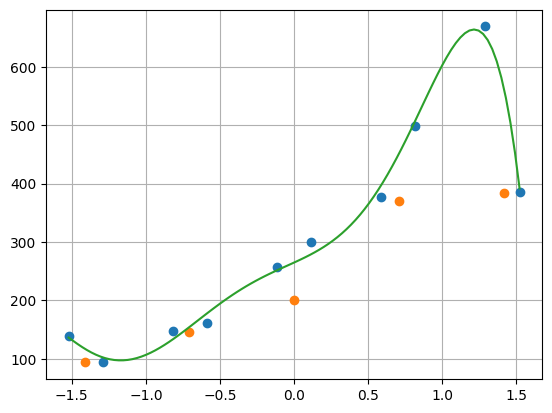

In [119]:
with open('./lin_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x_test = data[:, 0].reshape(-1, 1)
x_test = standard_scaler.fit_transform(x_test)
y_test = data[:, 1]


x_values_poly = poly_features.transform(x_test)
print("cost = ", calculate_cost(x_values_poly, y_test, theta))

plt.plot(x, y, "o")
plt.plot(x_test, y_test, "o")
plt.plot(x_values, y_values)
plt.grid()
plt.show()

koszt jest dwa rzędy wielkości większy




### Zadanie 2
Proszę zmodyfikować skrypt optymalizacji poszerzając go o regularyzację. Należy zmodyfikować f. kosztu o sumę kwadratów wag:

In [120]:
def calculate_cost(X, Y, theta, lamb=0.5):
    f = h_fun(X, theta)
    return  ((1-lamb) * np.mean((f - Y)**2) + lamb * 0.5*np.mean(theta ** 2))

traincost  =  5308.143773288802
testcost =  4803.955449418221


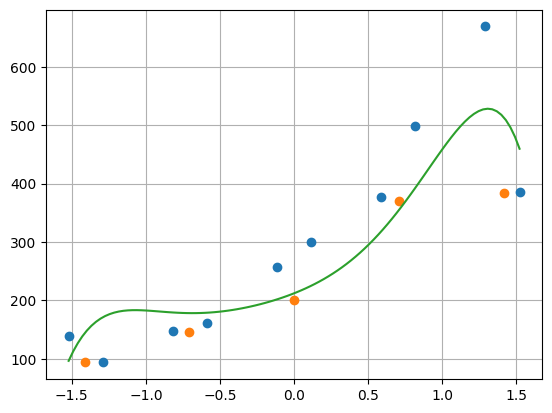

In [121]:
poly_features = PolynomialFeatures(degree=6)
fitter_scaler = poly_features.fit_transform(x)

eps = 1e-1
alpha = 1e-3
theta = np.zeros(fitter_scaler.shape[1])
f = h_fun(fitter_scaler, theta)
lamb = 0.7

J = calculate_cost(fitter_scaler, y, theta, lamb=lamb)
J2 = J + 10
m = len(x)
while np.abs(J - J2) > eps:
    J = J2
    h_y_diff = (h_fun(fitter_scaler, theta) - y)
    gradient = np.dot(fitter_scaler.T, h_y_diff)
    theta = theta - alpha * gradient / m
    J2 = calculate_cost(fitter_scaler, y, theta, lamb=lamb)

print("traincost  = ", J)
x_values_poly = poly_features.transform(x_test)
print("testcost = ", calculate_cost(x_values_poly, y_test, theta, lamb=lamb))

x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)
y_values = h_fun(x_values_poly, theta)
plt.figure()
plt.plot(x, y, "o")
plt.plot(x_test, y_test, "o")
plt.plot(x_values, y_values)
plt.grid()
plt.show()

In [122]:
def h_fun(X, theta):
    z = np.dot(X, theta)
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, Y, theta, lamb=0.5):
    h = h_fun(X, theta)
    y_1 = -Y*np.log(h+1e-15)
    y_0 = -(1-Y)*np.log(1-h+1e-15)
    return ((1-lamb) * (y_1 + y_0).mean() + lamb * 0.5*np.mean(theta ** 2))

In [123]:
with open('./logi_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x = data[:, 0:2]
x = standard_scaler.fit_transform(x)
y = data[:, 2]


with open('./logi_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x_test =  data[:, 0:2]
x_test = standard_scaler.fit_transform(x_test)
y_test = data[:, 2]

traincost =  0.10733077194960418
testcost =  0.1619978502742079


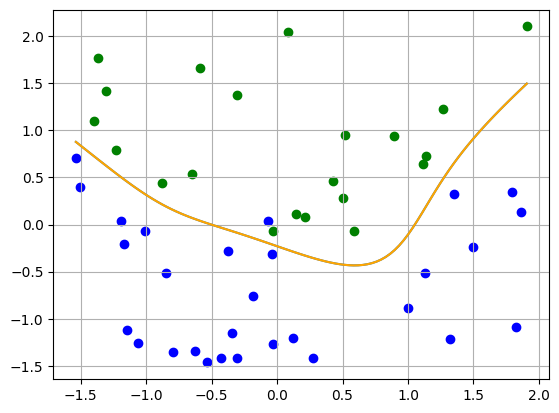

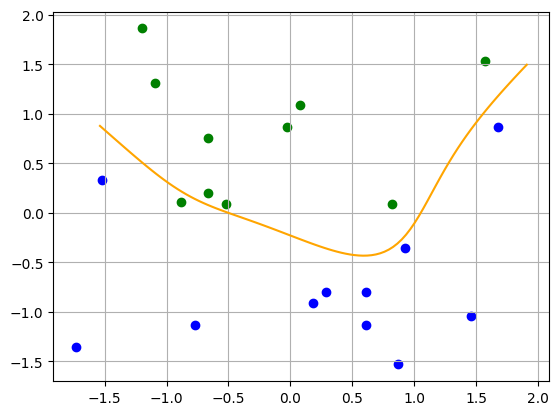

In [124]:
poly_features = PolynomialFeatures(degree=6)
fitter_scaler = poly_features.fit_transform(x)

eps = 1e-6
alpha = 1e-1
theta = np.zeros(fitter_scaler.shape[1])
f = h_fun(fitter_scaler, theta)
lamb = 0.1

J = calculate_cost(fitter_scaler, y, theta, lamb=lamb)
J2 = J + 2 * eps
m = len(x)
while np.abs(J - J2) > eps:
    J = J2
    h_y_diff = (h_fun(fitter_scaler, theta) - y)
    gradient = np.dot(fitter_scaler.T, h_y_diff)
    theta = theta - alpha * gradient / m
    J2 = calculate_cost(fitter_scaler, y, theta, lamb=lamb)


x_values_poly = poly_features.transform(x_test)
print("traincost = ", J)
print("testcost = ", calculate_cost(x_values_poly, y_test, theta, lamb=lamb))

x_line = np.zeros((100, 2))
x_line[:, 0] = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)

def dot_product_abs(x_line_1):
    x_line[:, 1] = x_line_1
    dot_product = -np.dot(poly_features.transform(x_line), theta)
    return sum(abs(dot_product))

x_line[:, 1] = minimize(dot_product_abs, x_line[:, 1]).x

plt.figure()
plt.plot(x_line[:, 0], x_line[:, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1], color="green")
plt.scatter(x[y == 0, 0], x[y == 0, 1], color="blue")
plt.plot(x_line[:, 0], x_line[:, 1], color="orange")
plt.grid()
plt.show()


plt.figure()
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], color="green")
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], color="blue")
plt.plot(x_line[:, 0], x_line[:, 1], color="orange")
plt.grid()
plt.show()

In [125]:
def calculate_cost(X, y, model):
    return -np.mean(y * np.log(model.predict_proba(X)[:, 1]) + (1 - y) * np.log(1 - model.predict_proba(X)[:, 1]))

TrainCost =  0.24780135221317898
TestCost =  0.28709811834753357


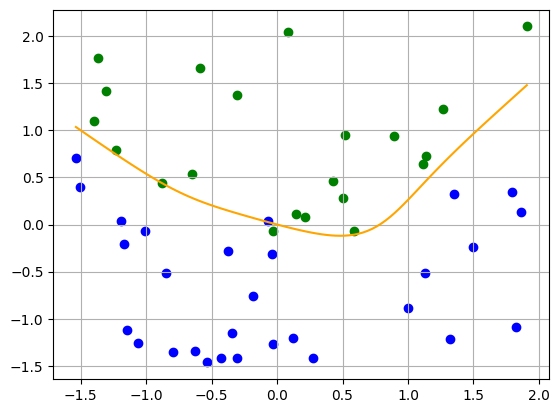

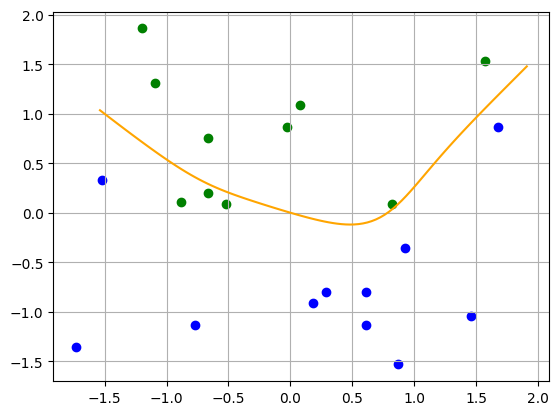

In [126]:
from sklearn.linear_model import LogisticRegression

poly_features = PolynomialFeatures(degree=6)
x_poly = poly_features.fit_transform(x)
x_test_poly = poly_features.transform(x_test)

model = LogisticRegression(penalty='l2', C=0.1)
model.fit(x_poly, y)

train_cost = calculate_cost(x_poly, y, model)
test_cost = calculate_cost(x_test_poly, y_test, model)

print("TrainCost = ", train_cost)
print("TestCost = ", test_cost)


# Odtwarzanie lini
x_line = np.zeros((100, 2))
x_line[:, 0] = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)

def dot_product_abs(x_line_1):
    x_line[:, 1] = x_line_1
    dot_product = -np.dot(poly_features.transform(x_line), model.coef_[0])
    return sum(abs(dot_product))

x_line[:, 1] = minimize(dot_product_abs, x_line[:, 1]).x



plt.scatter(x[y == 1, 0], x[y == 1, 1], color="green")
plt.scatter(x[y == 0, 0], x[y == 0, 1], color="blue")
plt.plot(x_line[:, 0], x_line[:, 1], color="orange")
plt.grid()
plt.show()


plt.figure()
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], color="green")
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], color="blue")
plt.plot(x_line[:, 0], x_line[:, 1], color="orange")

plt.grid()
plt.show()

In [127]:
from sklearn.datasets import load_iris
 
data = load_iris()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()

x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [128]:
def logisticreg(x_train, x_test, y_train, y_test, penalty=None, C=0.01):
    log_regr = LogisticRegression(penalty=penalty, C=C)
    log_regr.fit(x_train, y_train)
    y_test_pred = log_regr.predict(x_test)
    print(classification_report(y_test, y_test_pred))

In [129]:
logisticreg(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



C:\Users\janro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [130]:
poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test) 

logisticreg(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



C:\Users\janro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [131]:
logisticreg(x_train, x_test, y_train, y_test, "l2", 0.999)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\janro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
logisticreg(x_train, x_test, y_train, y_test, "l2", 0.75)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\janro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
logisticreg(x_train, x_test, y_train, y_test, "l2", 0.5)

C:\Users\janro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [134]:
logisticreg(x_train, x_test, y_train, y_test, "l2", 0.25)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

